<a href="https://colab.research.google.com/github/medhu07/stock_predictor/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
start= '2012-01-01'
end = '2025-12-31'
stock = 'GOOG'

data=yf.download(stock ,start,end)

/tmp/ipython-input-3991928833.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(stock ,start,end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
data.reset_index(inplace=True)
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.449755,16.517492,16.127389,16.141482,147611217
1,2012-01-04,16.520704,16.569406,16.331340,16.440361,114989399
2,2012-01-05,16.291538,16.414156,16.222813,16.368669,131808205
3,2012-01-06,16.069294,16.316011,16.063607,16.294997,108119746
4,2012-01-09,15.387976,15.994635,15.357568,15.982273,233776981


In [ ]:
ma_100_days=data.Close.rolling(100).mean()

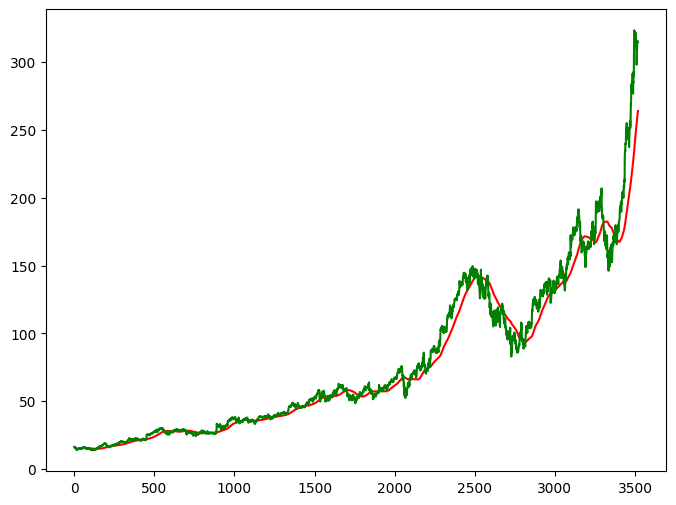

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
ma_200_days=data.Close.rolling(200).mean()

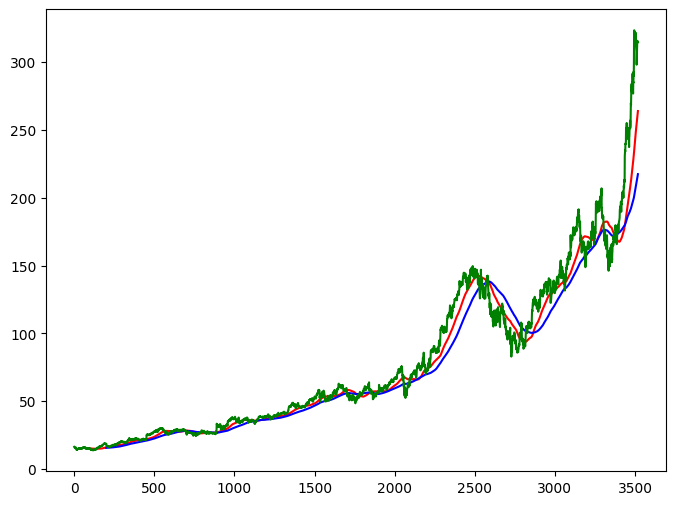

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [ ]:
data_train.shape

(2815, 1)

In [ ]:
data_test.shape

(704, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale=scaler.fit_transform(data_train)

In [ ]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [ ]:
x,y=np.array(x),np.array(y)

In [ ]:
from keras.layers import Dense,Dropout ,LSTM
from keras.models import Sequential


In [ ]:
model = Sequential()
model.add(LSTM(units=50,activation = 'relu', return_sequences=True,
               input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,activation = 'relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation = 'relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 29s 248ms/step - loss: 0.0470
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 262ms/step - loss: 0.0065
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - loss: 0.0060
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 260ms/step - loss: 0.0050
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - loss: 0.0049
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 253ms/step - loss: 0.0042
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 250ms/step - loss: 0.0042
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 260ms/step - loss: 0.0043
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - loss: 0.0042
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 246ms/step - loss: 0.0036
Epoch 11/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 42s 261ms/step - loss: 0.0034
Epoch 12/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 41s 259ms/step - loss: 0.0030
Epoch 13/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step - loss: 0.0031
Epoch 14/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 292ms/step - loss: 0.0028
Epoch 15/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 21s 

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [ ]:
pas_100_days=data_train.tail(100)

In [ ]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [ ]:
data_test

Ticker,GOOG
0,100.029770
1,100.635223
2,99.543404
3,99.781624
4,100.724556
...,...
799,315.679993
800,315.670013
801,314.959991
802,314.390015


In [ ]:
data_test_scale=scaler.fit_transform(data_test)

In [ ]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])
x,y=np.array(x),np.array(y)

In [ ]:
y_predict=model.predict(x)

85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step


In [ ]:
scale=1/scaler.scale_

In [ ]:
y_predict=y_predict*scale

In [ ]:
y=y*scale

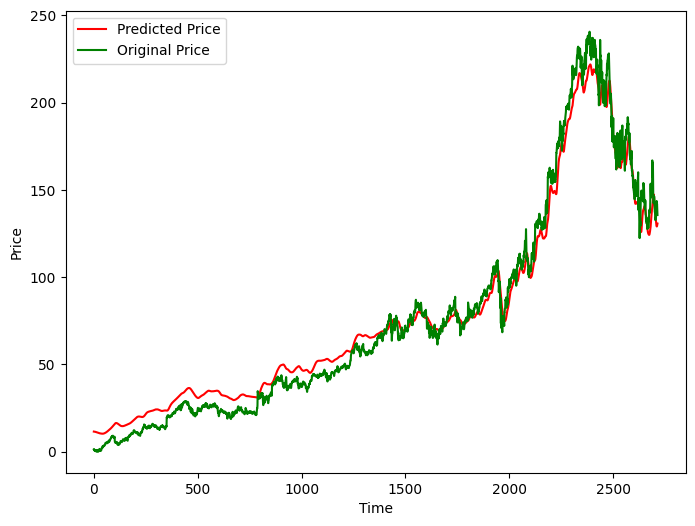

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save('Stock Predictions Model.keras')